In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
dataframe = pd.read_csv(r"cars.csv")
dataframe.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,1
1,31.9,4,89,71,1925,14,1980,2
2,17.0,8,302,140,3449,11,1971,1
3,15.0,8,400,150,3761,10,1971,1
4,30.5,4,98,63,2051,17,1978,1


In [3]:
print(dataframe.groupby('brand').size())

brand
1    162
2     48
3     51
dtype: int64


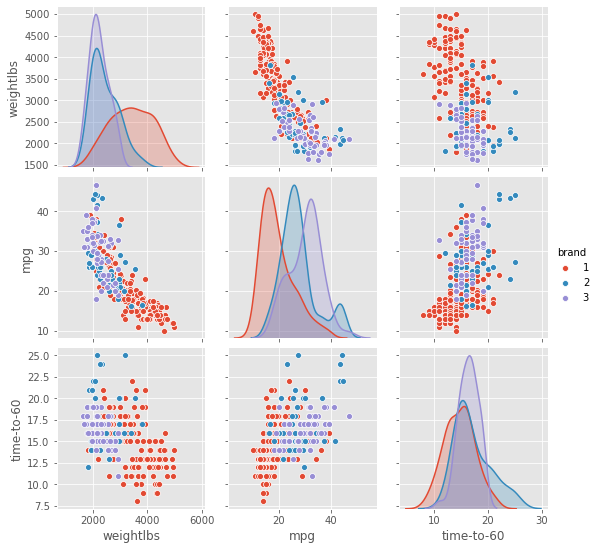

In [4]:
sb.pairplot(dataframe.dropna(),hue='brand',vars=["weightlbs","mpg","time-to-60"],kind='scatter')

In [5]:
X = np.array(dataframe[["weightlbs","mpg","time-to-60"]])
y = np.array(dataframe['brand'])
X.shape

(261, 3)

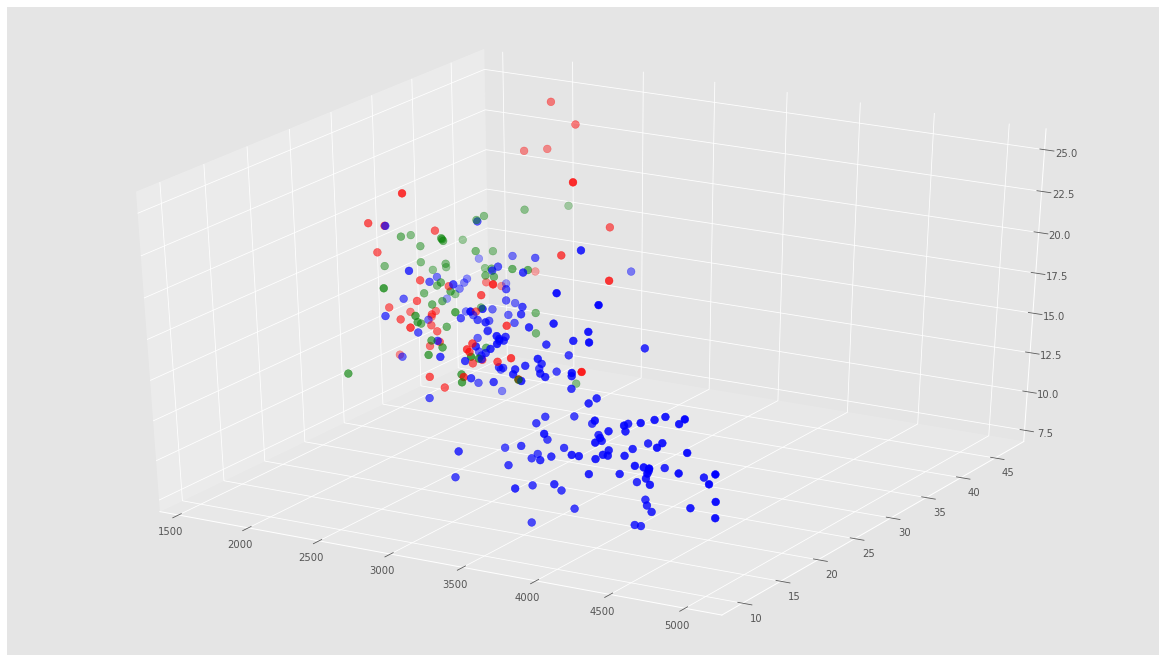

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
colores = ['blue','red','green']
asignar = []
for row in y:
    asignar.append(colores[row-1])
ax.scatter(X[:,0], X[:,1], X[:,2],c=asignar,s=60)

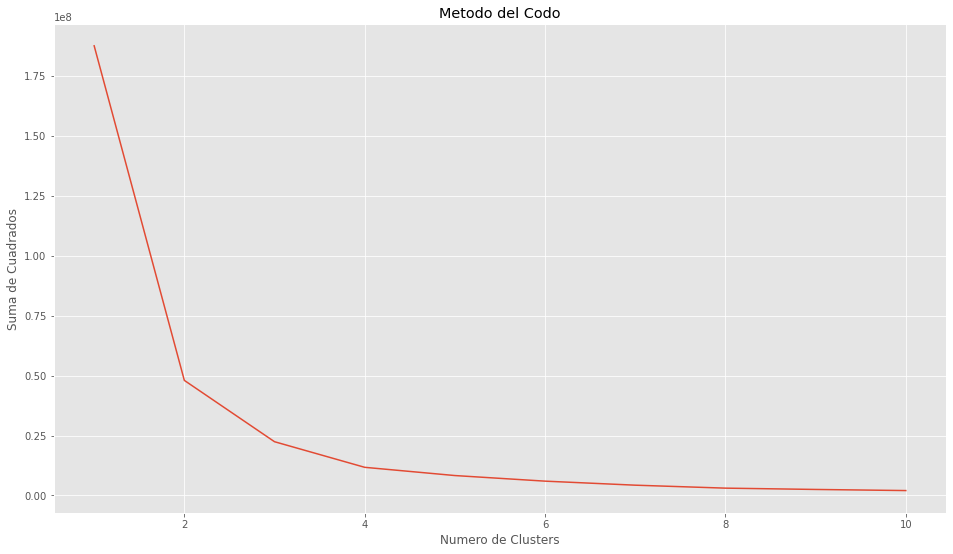

In [7]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Metodo del Codo')
plt.xlabel('Numero de Clusters')
plt.ylabel('Suma de Cuadrados')
plt.show()

In [8]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[2233.28448276   29.60344828   16.61206897]
 [4232.11290323   14.80645161   13.35483871]
 [3182.10843373   20.34698795   15.69879518]]


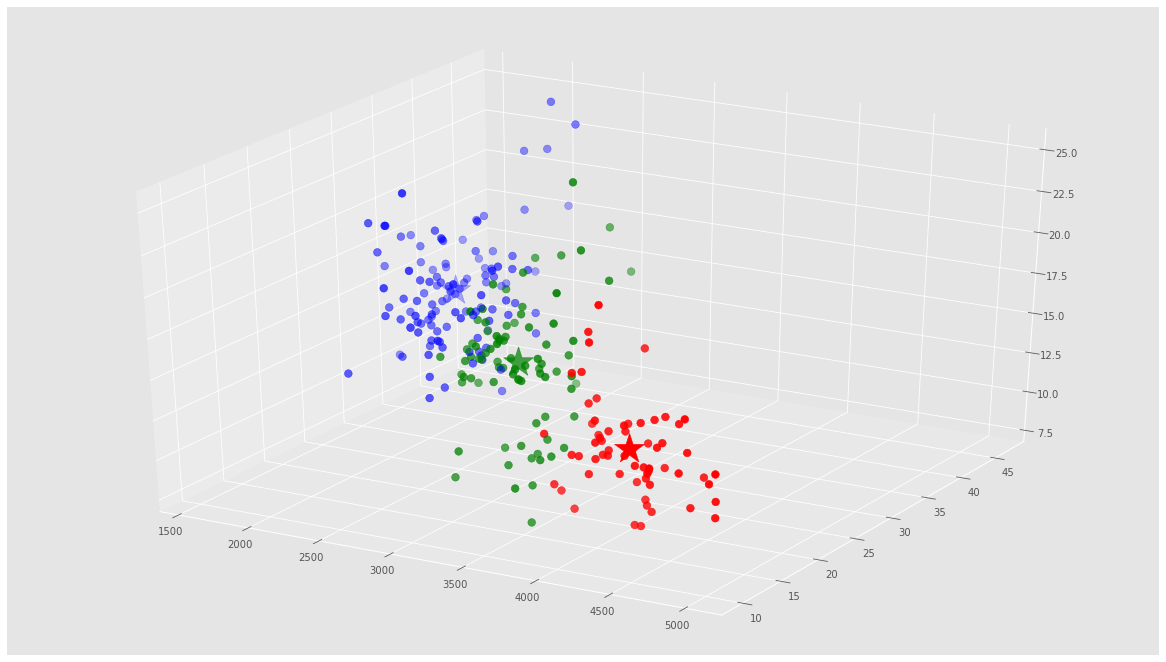

In [9]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['blue','red','green']
asignar=[]
for row in labels:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

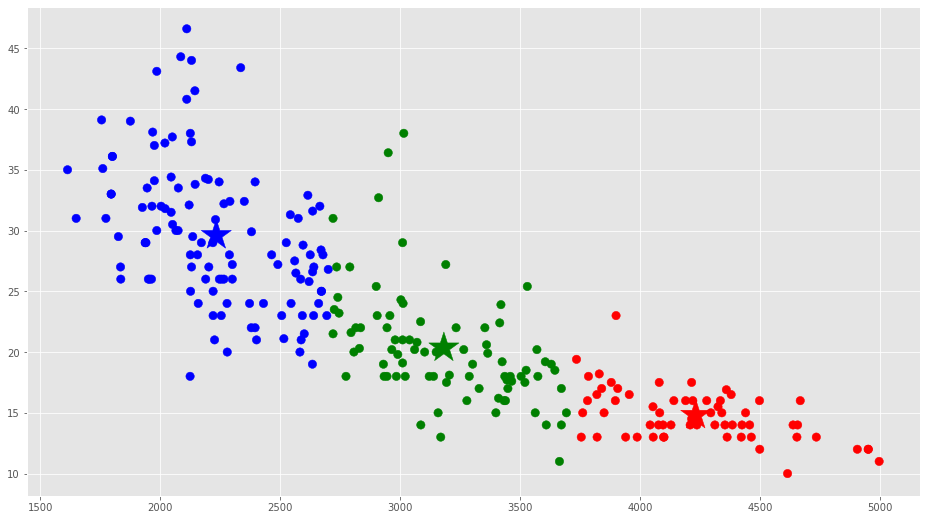

In [10]:
f1 = dataframe['weightlbs'].values
f2 = dataframe['mpg'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

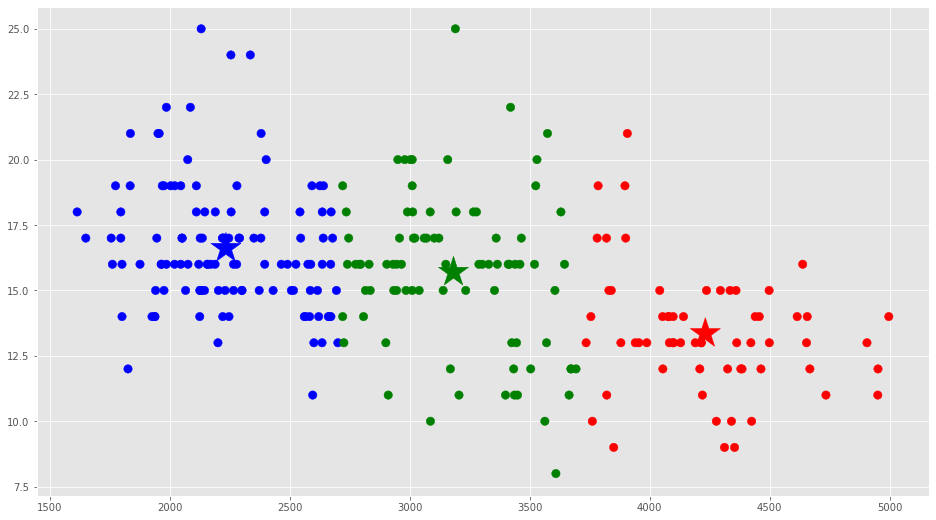

In [11]:
f1 = dataframe['weightlbs'].values
f2 = dataframe['time-to-60'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

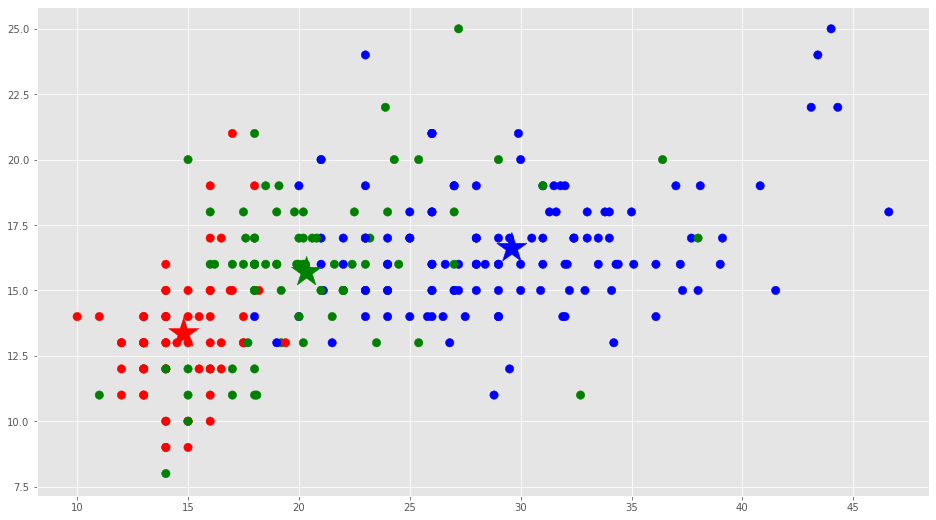

In [12]:
f1 = dataframe['mpg'].values
f2 = dataframe['time-to-60'].values
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()